In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import copy

# Shuffle Data

In [2]:
data = pd.read_csv('final_train_ll.csv')
data_used = data.sample(frac = 1).drop('Unnamed: 0',axis = 1)
data_used = data_used.reset_index(drop = True)

In [8]:
x = data_used.drop('class',axis = 1)
y = data_used['class']

kf = KFold(n_splits = 5)
kappa = 0
for train_index, test_index in kf.split(x):
    print('train_index', train_index, 'test_index', test_index)
    train_X, train_y = x.iloc[train_index], y[train_index]
    test_X, test_y = x.iloc[test_index], y[test_index]
    classifier = XGBClassifier(max_depth = 20, n_estimators = 200,objective = 'multi:softmax',num_class = 3)
    classifier.fit(train_X,train_y)
    y_predict = classifier.predict(test_X)
    kappa += cohen_kappa_score(test_y,y_predict)
    print(kappa/5)

train_index [ 2712  2713  2714 ... 13553 13554 13555] test_index [   0    1    2 ... 2709 2710 2711]
0.1447096411543872
train_index [    0     1     2 ... 13553 13554 13555] test_index [2712 2713 2714 ... 5420 5421 5422]
0.2881942397450502
train_index [    0     1     2 ... 13553 13554 13555] test_index [5423 5424 5425 ... 8131 8132 8133]
0.431662215738798
train_index [    0     1     2 ... 13553 13554 13555] test_index [ 8134  8135  8136 ... 10842 10843 10844]
0.5737275842151688
train_index [    0     1     2 ... 10842 10843 10844] test_index [10845 10846 10847 ... 13553 13554 13555]
0.7149947475940259


# Extract Important Features

In [9]:
feature_imp = pd.Series(classifier.feature_importances_,index = x.columns).sort_values(ascending = False)
feature_imp.head(20)

blogger_fans           0.243774
blogger_tag            0.105376
video                  0.096018
blogger_posts          0.069824
blogger_gender         0.057384
picture                0.053261
blogger_follows        0.052603
no_related_accounts    0.040014
post                   0.038802
no_topics              0.031291
brand_fans             0.028527
brand_hot_topic        0.027915
brand_posts            0.027613
brand_follows          0.026007
produc_score           0.026006
brand_gender           0.025481
product_price          0.025320
product_popularity     0.024784
dtype: float32

No handles with labels found to put in legend.


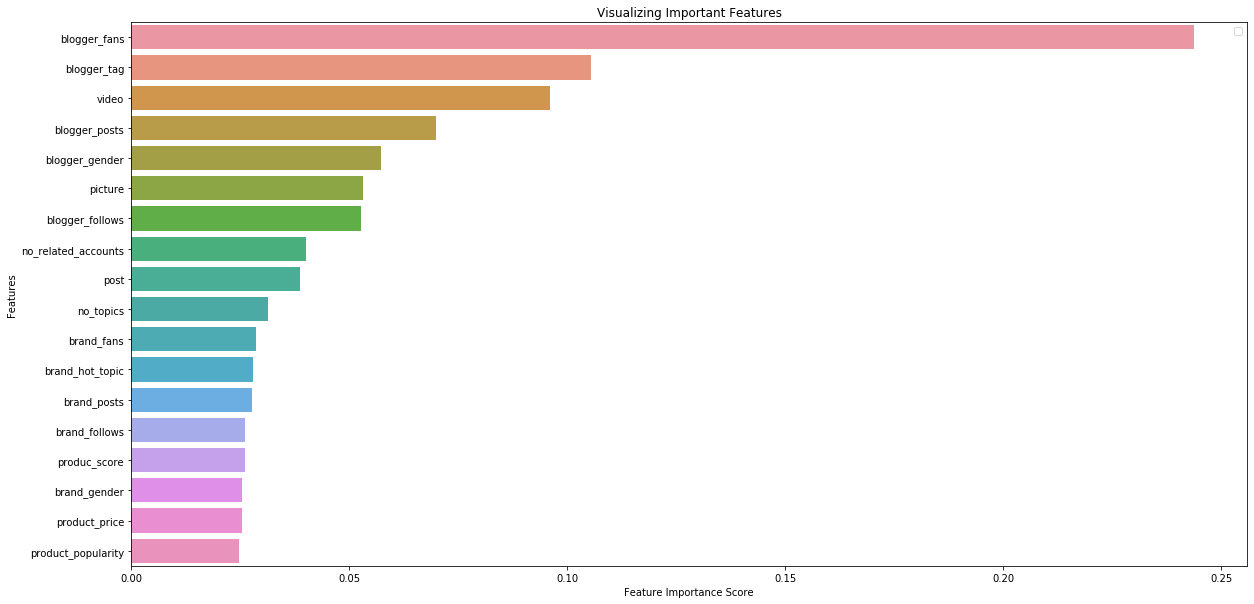

In [10]:
plt.figure(figsize = (20,10)) 

# create a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()